# Label Encoding

* 문자형 변수를 숫자형 변수로 인코딩

In [29]:
import warnings
warnings.filterwarnings('ignore')

## 실습 데이터

* 자동차 연비(mpg) 데이터
 * mpg : miles per gallon
 * 1 mile : 1.6 Km
 * 1 gallon : 3.78 Liter

In [30]:
import seaborn as sns

DF = sns.load_dataset('mpg')

In [31]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


* 문자형 데이터 : 'origin'

In [32]:
DF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [33]:
type(DF.origin[0])

str

* 명목형 : 이름확인 및 빈도분석

In [34]:
DF.origin.value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

* 'origin' Data

In [35]:
X = DF[['origin']]

In [36]:
X[111:115]

,origin
111,japan
112,usa
113,usa
114,europe


## With LabelEncoder

* 정수(Integer) 인코딩

In [37]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder?

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
LE = encoder1.fit_transform(X)

* 정수 인코딩 결과

In [38]:
X

,origin
0,usa
1,usa
2,usa
3,usa
4,usa
...,...
393,usa
394,europe
395,usa
396,usa


In [39]:
LE[111:115]

array([1, 2, 2, 0])

## With OneHotEncoder

* 원-핫(One-Hot) 인코딩

In [14]:
from sklearn.preprocessing import OneHotEncoder 

encoder2 = OneHotEncoder()
OHE = encoder2.fit_transform(X)

* Array 변환 필요

In [40]:
print(OHE[111:115])

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 0)	1.0


In [41]:
OHE.toarray()[111:115]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

# Scaling

* 범위(Scale)가 다른 변수의 범위(Scale)를 비슷하게 맞추기 위한 목적

In [20]:
import warnings
warnings.filterwarnings('ignore')

## 실습 데이터

> ## 1) seaborn 'mpg' Data Set

In [17]:
import seaborn as sns

DF = sns.load_dataset('mpg')

* 자동차 연비(mpg) 데이터
 * mpg : miles per gallon
 * 1 mile : 1.6 Km
 * 1 gallon : 3.78 Liter

In [42]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [19]:
DF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


* X, y Data

In [43]:
X = DF[['weight']]
y = DF['mpg']

## Without Scaling

* X값 확인

In [44]:
X[:5]

,weight
0,3504
1,3693
2,3436
3,3433
4,3449


In [45]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

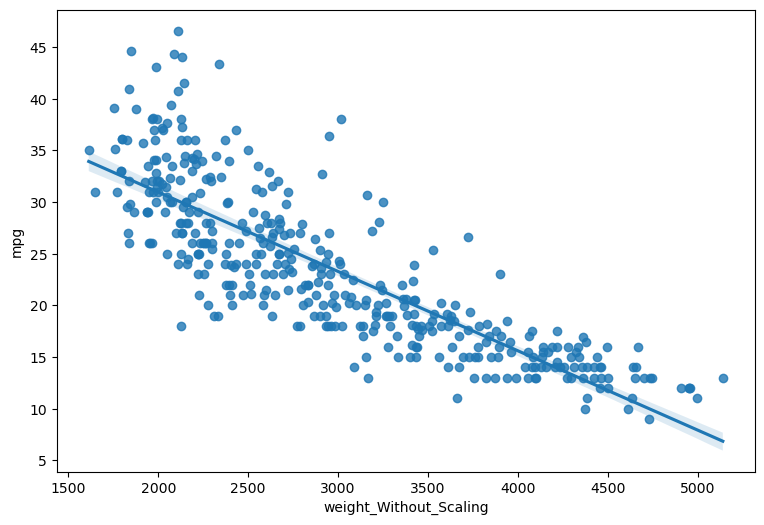

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (9, 6))
sns.regplot(x = X, y = y)
plt.xlabel('weight_Without_Scaling')
plt.show()

## With Normalization

* sklearn Package

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
X_Norm = scaler1.fit_transform(X)

* 정규화된 X값 확인

In [24]:
X_Norm[:5]

array([[0.5361497 ],
       [0.58973632],
       [0.51686986],
       [0.51601928],
       [0.52055571]])

* 정규화된 X값 모델생성

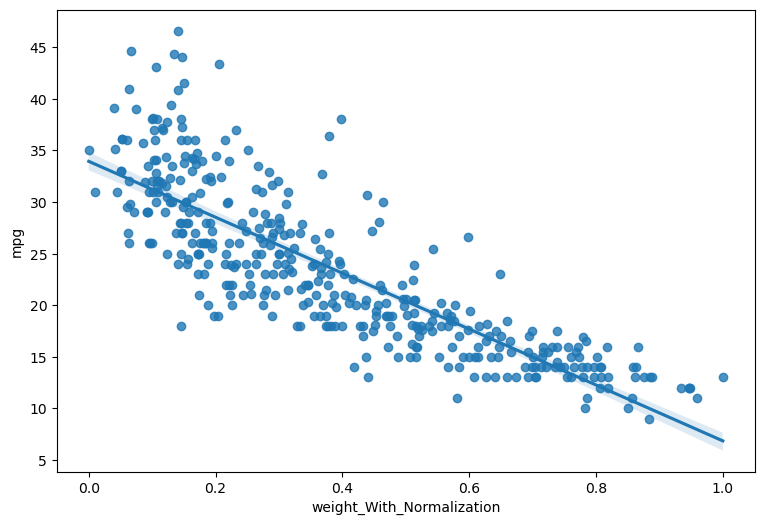

In [25]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = X_Norm, y = y)
plt.xlabel('weight_With_Normalization')
plt.show()

## With Standardization

* sklearn Package

In [26]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X_Stan = scaler2.fit_transform(X)

* 표준화된 X값 확인

In [27]:
X_Stan[:5]

array([[0.63086987],
       [0.85433297],
       [0.55047045],
       [0.54692342],
       [0.56584093]])

* 표준화된 X값 모델생성

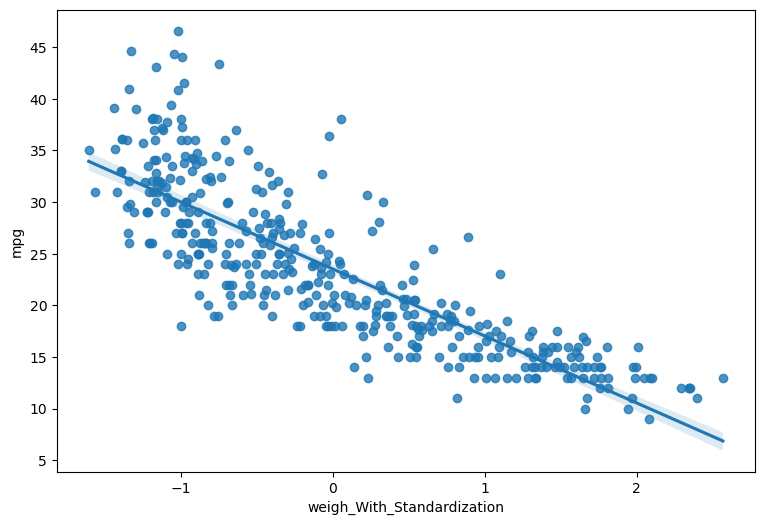

In [28]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = X_Stan, y = y)
plt.xlabel('weigh_With_Standardization')
plt.show()

# The End 